## POS tagging using modified Viterbi

### Data Preparation

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import nltk, random, time

import matplotlib.pyplot as plt 
import seaborn as sns

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from collections import Counter

# To display all the rows
pd.options.display.max_rows = 400

In [2]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset = 'universal'))

nltk_data[:40]

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

In [3]:
# Splitting into train and test
random.seed(100)
train_set, test_set = train_test_split(nltk_data, train_size = 0.95, test_size = 0.05, random_state = 100)

print("Length of Train Set =", len(train_set))
print("\nLength of Test Set =", len(test_set))

Length of Train Set = 3718

Length of Test Set = 196


In [4]:
# Display Train Set
print(train_set)

[[('One', 'NUM'), ('bright', 'ADJ'), ('sign', 'NOUN'), ('is', 'VERB'), ('that', 'ADP'), ('a', 'DET'), ('growing', 'VERB'), ('number', 'NOUN'), ('of', 'ADP'), ('women', 'NOUN'), ('have', 'VERB'), ('entered', 'VERB'), ('the', 'DET'), ('once', 'ADV'), ('male-dominated', 'ADJ'), ('field', 'NOUN'), (';', '.'), ('more', 'ADJ'), ('than', 'ADP'), ('a', 'DET'), ('third', 'ADJ'), ('of', 'ADP'), ('the', 'DET'), ('ringers', 'NOUN'), ('today', 'NOUN'), ('are', 'VERB'), ('women', 'NOUN'), ('.', '.')], [('``', '.'), ('These', 'DET'), ('days', 'NOUN'), (',', '.'), ('banking', 'NOUN'), ('customers', 'NOUN'), ('walk', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('door', 'NOUN'), ('*-1', 'X'), ('expecting', 'VERB'), ('you', 'PRON'), ('to', 'PRT'), ('have', 'VERB'), ('a', 'DET'), ('package', 'NOUN'), ('especially', 'ADV'), ('for', 'ADP'), ('them', 'PRON'), (',', '.'), ("''", '.'), ('Ms.', 'NOUN'), ('Moore', 'NOUN'), ('says', 'VERB'), ('*T*-2', 'X'), ('.', '.')], [('The', 'DET'), ('rights', 'NOUN'), (',', '.')

In [5]:
# Display Test Set
print(test_set)

[[('Investors', 'NOUN'), ('took', 'VERB'), ('advantage', 'NOUN'), ('of', 'ADP'), ('Tuesday', 'NOUN'), ("'s", 'PRT'), ('stock', 'NOUN'), ('rally', 'NOUN'), ('*-1', 'X'), ('to', 'PRT'), ('book', 'VERB'), ('some', 'DET'), ('profits', 'NOUN'), ('yesterday', 'NOUN'), (',', '.'), ('*-1', 'X'), ('leaving', 'VERB'), ('stocks', 'ADV'), ('up', 'ADP'), ('fractionally', 'ADV'), ('.', '.')], [('Buying', 'VERB'), ('for', 'ADP'), ('the', 'DET'), ('most', 'ADJ'), ('part', 'NOUN'), ('carried', 'VERB'), ('over', 'PRT'), ('from', 'ADP'), ('the', 'DET'), ('previous', 'ADJ'), ('session', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('traders', 'NOUN'), ('apparently', 'ADV'), ('ignored', 'VERB'), ('reports', 'NOUN'), ('that', 'ADP'), ('a', 'DET'), ('Chilean', 'ADJ'), ('mine', 'ADJ'), ('strike', 'NOUN'), ('may', 'VERB'), ('have', 'VERB'), ('ended', 'VERB'), ('almost', 'ADV'), ('before', 'ADP'), ('it', 'PRON'), ('began', 'VERB'), (',', '.'), ('an', 'DET'), ('analyst', 'NOUN'), ('said', 'VERB'), ('0', 'X'), ('*T*-1',

In [6]:
# Custom Function to get tagged words, tokens, Vocabulary and number of tags
def get_tagged_details(word_set, tagged_words_flag = True):
    
    random.seed(100)
    
    if tagged_words_flag == True:
        # Getting list of tagged words
        tagged_words = [tup for sent in word_set for tup in sent]
    else:
        tagged_words = word_set
    
    # tokens
    tokens = [pair[0] for pair in tagged_words]
    print("Some Tokens = ", tokens[:10])
    
    # vocabulary
    vocab = set(tokens)
    print("\nVocabulary Count =", len(vocab))
    
    # number of tags
    T = [pair[1] for pair in tagged_words]
    tags = set(T)
    print("\nTag Count =", len(tags))
    print("\nTags = ", tags)
    
    # Most frequent tag in the train set
    most_frequent_tag_counts = Counter(T)
    print("\n", most_frequent_tag_counts.most_common(12))
    
    return (tagged_words, tokens, tags)

In [7]:
# Getting list of tagged words of train_set
print("Train Set Details")
print("_________________\n")

train_tagged_words, train_tokens, train_tags = get_tagged_details(train_set)

print("\nTotal Count of tagged words in Train Set =", len(train_tagged_words))

Train Set Details
_________________

Some Tokens =  ['One', 'bright', 'sign', 'is', 'that', 'a', 'growing', 'number', 'of', 'women']

Vocabulary Count = 12106

Tag Count = 12

Tags =  {'NUM', '.', 'PRT', 'CONJ', 'X', 'ADP', 'VERB', 'DET', 'ADV', 'NOUN', 'PRON', 'ADJ'}

 [('NOUN', 27539), ('VERB', 12919), ('.', 11149), ('ADP', 9433), ('DET', 8318), ('X', 6301), ('ADJ', 6105), ('NUM', 3366), ('PRT', 3048), ('ADV', 3004), ('PRON', 2610), ('CONJ', 2157)]

Total Count of tagged words in Train Set = 95949


### Emission Probabilities

In [8]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

### Transition Probabilities

In [9]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [10]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(train_tags), len(train_tags)), dtype='float32')
for i, t1 in enumerate(list(train_tags)):
    for j, t2 in enumerate(list(train_tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(train_tags), index = list(train_tags))
tags_df

,NUM,.,PRT,CONJ,X,ADP,VERB,DET,ADV,NOUN,PRON,ADJ
NUM,0.184195,0.118835,0.026144,0.013072,0.211824,0.035056,0.016934,0.003862,0.002674,0.352347,0.001485,0.033571
.,0.081353,0.092923,0.002511,0.058032,0.026908,0.092206,0.088708,0.173558,0.052292,0.222531,0.065208,0.043681
PRT,0.056102,0.043635,0.001969,0.002297,0.013123,0.019357,0.405184,0.101050,0.010171,0.245735,0.017717,0.083661
CONJ,0.042188,0.035698,0.003709,0.000464,0.008809,0.053778,0.155308,0.118683,0.053778,0.350487,0.058414,0.118683
X,0.002857,0.162831,0.184891,0.010316,0.074433,0.144898,0.204571,0.055229,0.025393,0.062371,0.055705,0.016505
ADP,0.061910,0.039754,0.001484,0.000848,0.034984,0.017492,0.008481,0.323969,0.013357,0.321213,0.069119,0.107389
VERB,0.022448,0.034291,0.031427,0.005186,0.218438,0.091184,0.168744,0.133292,0.082050,0.111386,0.035916,0.065640
DET,0.021640,0.017913,0.000240,0.000481,0.045323,0.009618,0.040394,0.005771,0.012623,0.637293,0.003727,0.204977
ADV,0.031624,0.135153,0.014314,0.006991,0.023302,0.119507,0.344541,0.069907,0.077230,0.031624,0.015646,0.130160
NOUN,0.009550,0.239951,0.043357,0.042921,0.028868,0.177058,0.146955,0.013363,0.016813,0.264280,0.004721,0.012165


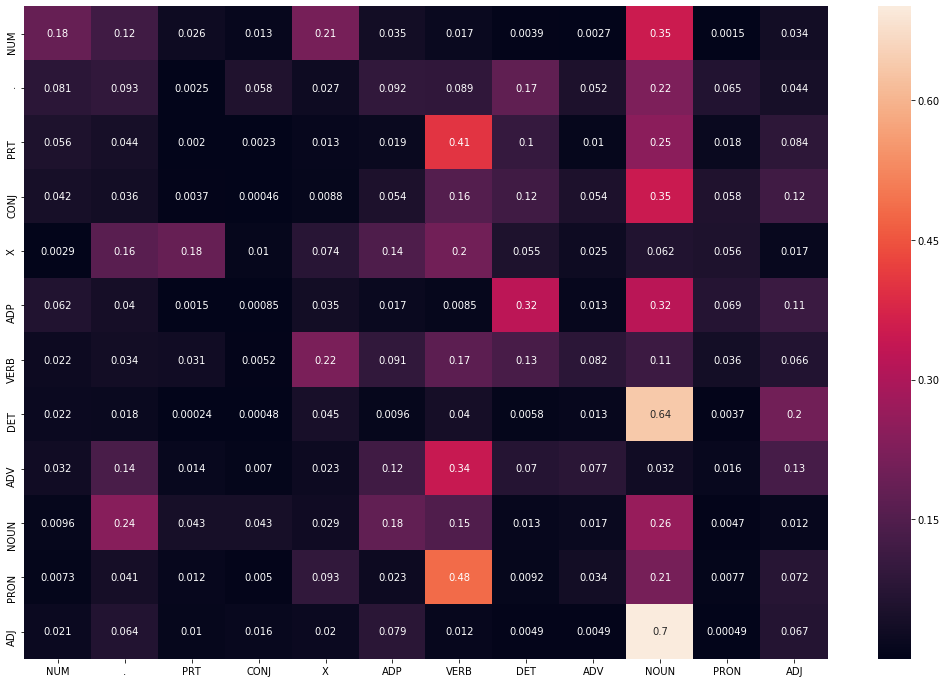

In [11]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize = (18, 12))

sns.heatmap(tags_df, annot = True)

plt.show()

In [12]:
# Getting list of tagged words of test_set
print("Test Set Details")
print("_________________\n")

test_tagged_words, test_tokens, test_tags = get_tagged_details(test_set)

print("\nTotal Count of tagged words in Test Set =", len(test_tagged_words))

Test Set Details
_________________

Some Tokens =  ['Investors', 'took', 'advantage', 'of', 'Tuesday', "'s", 'stock', 'rally', '*-1', 'to']

Vocabulary Count = 1801

Tag Count = 12

Tags =  {'PRT', '.', 'CONJ', 'NUM', 'X', 'ADP', 'VERB', 'DET', 'ADV', 'NOUN', 'PRON', 'ADJ'}

 [('NOUN', 1328), ('VERB', 645), ('.', 566), ('ADP', 424), ('DET', 407), ('X', 312), ('ADJ', 292), ('NUM', 180), ('PRT', 171), ('ADV', 167), ('PRON', 127), ('CONJ', 108)]

Total Count of tagged words in Test Set = 4727


### Unknown Words

In [13]:
# Unique Vocabulary in Train Set
train_vocab = set(train_tokens)

# Unique Vocabulary in Test Set
test_vocab = set(test_tokens)

# Unknown Words
unknown_words = set(test_vocab - train_vocab)
print("Total Count of Unknown Words =", len(unknown_words), "\n")
print(unknown_words)

Total Count of Unknown Words = 302 

{'delayed', 'loose', 'Mead', 'Louisiana-Pacific', 'outlawing', 'readings', 'heirs', 'initiate', 'ignored', 'applicable', 'genie', 'behemoth', 'insane', 'marvelously', 'cleaner-burning', '143.08', 'Malta', 'Palmer', 'Video', '609', 'Iran-Contra', 'mushy', 'portrayal', 'tailor-made', 'intoxication', 'adults', 'Tots', 'impressive', 'shipboard', '51.6', 'improbable', 'defeats', '62-year-old', 'information-services', 'Corazon', 'APPEARS', '63-year-old', 'bricks', 'broadened', 'Mont', 'malnutrition', 'filled', 'Green', 'diagram', 'broadly', 'reclaimed', '143.93', 'leveraging', '126,000', 'executive-office', 'NEW', 'Indexing', 'pushes', 'sagged', 'Left', 'Trans', 'wealthy', 'espouse', '29year', 'movies', 'investor-relations', 'yellow', 'removing', 'money-losing', 'ACCOUNT', 'Peck', '141.9', 'Nylev', 'Chilver', 'ECONOMIC', 'housewife', '13.90', 'CoreStates', 'len', 'intricate', 'NCNB', 'highest-pitched', 'shop', '550,000', 'Philippine', 'Paris', 'refer', 'T

### Build the vanilla Viterbi based POS tagger

In [14]:
# Vanilla Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

#### Evaluate Vanilla Viterbi on Test Set

In [15]:
# tagging the test sentences
start = time.time()

tagged_seq = Viterbi(test_tokens)

end = time.time()
difference = end - start

print("Time taken in seconds =", difference)
print("\n")
print(tagged_seq)

Time taken in seconds = 1152.8026456832886


[('Investors', 'NOUN'), ('took', 'VERB'), ('advantage', 'NOUN'), ('of', 'ADP'), ('Tuesday', 'NOUN'), ("'s", 'PRT'), ('stock', 'NOUN'), ('rally', 'NOUN'), ('*-1', 'X'), ('to', 'PRT'), ('book', 'NOUN'), ('some', 'DET'), ('profits', 'NOUN'), ('yesterday', 'NOUN'), (',', '.'), ('*-1', 'X'), ('leaving', 'VERB'), ('stocks', 'NOUN'), ('up', 'PRT'), ('fractionally', 'ADV'), ('.', '.'), ('Buying', 'VERB'), ('for', 'ADP'), ('the', 'DET'), ('most', 'ADJ'), ('part', 'NOUN'), ('carried', 'VERB'), ('over', 'ADP'), ('from', 'ADP'), ('the', 'DET'), ('previous', 'ADJ'), ('session', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('traders', 'NOUN'), ('apparently', 'ADV'), ('ignored', 'NUM'), ('reports', 'NOUN'), ('that', 'ADP'), ('a', 'DET'), ('Chilean', 'ADJ'), ('mine', 'NOUN'), ('strike', 'NOUN'), ('may', 'VERB'), ('have', 'VERB'), ('ended', 'VERB'), ('almost', 'ADV'), ('before', 'ADP'), ('it', 'PRON'), ('began', 'VERB'), (',', '.'), ('an', 'DET'), ('analyst', 'NOUN

#### Evaluating tagging accuracy

In [16]:
# Custom Function to get accuracy and Incorrect Tagged Cases
def get_accuracy_incorrect_tagged_cases(tagged_seq, test_tagged_words):
    # accuracy
    check = [i for i, j in zip(tagged_seq, test_tagged_words) if i == j]
    accuracy = len(check)/len(tagged_seq)
    
    # Get Incorrect Tagged Cases
    actual_tag = [j[0] for i, j in enumerate(zip(test_tagged_words, tagged_seq)) if j[0] != j[1]]
    incorrect_tag = [j[1] for i, j in enumerate(zip(test_tagged_words, tagged_seq)) if j[0] != j[1]]
    
    return (accuracy, actual_tag, incorrect_tag)

In [17]:
# Get accuracy
accuracy_vanilla, actual_tag, incorrect_tag = get_accuracy_incorrect_tagged_cases(tagged_seq, test_tagged_words)

print("Accuracy of vanilla Viterbi based POS tagger =", accuracy_vanilla, "\n")

Accuracy of vanilla Viterbi based POS tagger = 0.91030251745293 



In [18]:
# Get Incorrect Tagged Cases
print("Count of Incorrect Tagged Case (vanilla Viterbi based POS tagger) =", len(incorrect_tag))

pd.DataFrame(data={'Actual':actual_tag, 'Incorrect': incorrect_tag})

Count of Incorrect Tagged Case (vanilla Viterbi based POS tagger) = 424


,Actual,Incorrect
0,"(book, VERB)","(book, NOUN)"
1,"(stocks, ADV)","(stocks, NOUN)"
2,"(up, ADP)","(up, PRT)"
3,"(over, PRT)","(over, ADP)"
4,"(ignored, VERB)","(ignored, NUM)"
5,"(mine, ADJ)","(mine, NOUN)"
6,"(Palestinian, NOUN)","(Palestinian, ADJ)"
7,"(first, ADV)","(first, ADJ)"
8,"(Preston, NOUN)","(Preston, NUM)"
9,"(Birmingham, NOUN)","(Birmingham, NUM)"


### Solve the problem of unknown words

### Method - 1

For unknown words (Words not present in the training set), emission probability is always zero. Zero probabilities on this will also result in that all possible state-sequences for an observation sequence containing an unknown
word will have probability 0 and therefore we need to modify the vanilla Viterbi algorithm to evaluate correctly on test set.

This method is derived based on the following rule:

1. For Unknown Words --> **State Probability = Transition Probability**
2. For Rest --> **State Probability = Emission Probability * Transition Probability**

In [19]:
# Custom Function to get the tag for which the probability is maximum
def get_max_probability_state(train_tags, words, key, state, emission_p_flag):
    #initialise list of probability column for a given observation
    p = [] 
    for tag in train_tags:
        if key == 0:
            transition_p = tags_df.loc['.', tag]
        else:
            transition_p = tags_df.loc[state[-1], tag]

        # compute emission and state probabilities
        if emission_p_flag == False:
            emission_p = 1
        else:
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
        
        state_probability = emission_p * transition_p
        
        p.append(state_probability)
    
    pmax = max(p)
    # getting state for which probability is maximum
    state_max = train_tags[p.index(pmax)]
    
    return state_max

### Building the Method - 1 Viterbi based POS tagger

In [20]:
# Viterbi Heuristic using Method - 1
def Viterbi_method1(words, train_vocab = train_vocab, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        
        # check for unknown word. If True, consider only transmission probability.
        if word not in train_vocab:
            # getting state for which probability is maximum
            state_max = get_max_probability_state(T, words, key, state, False)
        else:
            # getting state for which probability is maximum
            state_max = get_max_probability_state(T, words, key, state, True)
        
        state.append(state_max)
    
    return list(zip(words, state))

#### Evaluate Method - 1 Viterbi on Test Set

In [21]:
# Evaluate the test sentences
start = time.time()

tagged_seq = Viterbi_method1(test_tokens)

end = time.time()
difference = end - start

print("Time taken in seconds =", difference)
print("\n")
print(tagged_seq)

Time taken in seconds = 1479.1930680274963


[('Investors', 'NOUN'), ('took', 'VERB'), ('advantage', 'NOUN'), ('of', 'ADP'), ('Tuesday', 'NOUN'), ("'s", 'PRT'), ('stock', 'NOUN'), ('rally', 'NOUN'), ('*-1', 'X'), ('to', 'PRT'), ('book', 'NOUN'), ('some', 'DET'), ('profits', 'NOUN'), ('yesterday', 'NOUN'), (',', '.'), ('*-1', 'X'), ('leaving', 'VERB'), ('stocks', 'NOUN'), ('up', 'PRT'), ('fractionally', 'ADV'), ('.', '.'), ('Buying', 'VERB'), ('for', 'ADP'), ('the', 'DET'), ('most', 'ADJ'), ('part', 'NOUN'), ('carried', 'VERB'), ('over', 'ADP'), ('from', 'ADP'), ('the', 'DET'), ('previous', 'ADJ'), ('session', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('traders', 'NOUN'), ('apparently', 'ADV'), ('ignored', 'VERB'), ('reports', 'NOUN'), ('that', 'ADP'), ('a', 'DET'), ('Chilean', 'ADJ'), ('mine', 'NOUN'), ('strike', 'NOUN'), ('may', 'VERB'), ('have', 'VERB'), ('ended', 'VERB'), ('almost', 'ADV'), ('before', 'ADP'), ('it', 'PRON'), ('began', 'VERB'), (',', '.'), ('an', 'DET'), ('analyst', 'NOU

#### Evaluating tagging accuracy

In [22]:
# Get Accuracy
accuracy_method1, actual_tag, incorrect_tag = get_accuracy_incorrect_tagged_cases(tagged_seq, test_tagged_words)

print("Accuracy of Method - 1 Viterbi based POS tagger =", accuracy_method1, "\n")

Accuracy of Method - 1 Viterbi based POS tagger = 0.9331499894224666 



In [23]:
# Get Incorrect Tagged Cases
print("Count of Incorrect Tagged Case (Method - 1 Viterbi based POS tagger) =", len(incorrect_tag))

pd.DataFrame(data={'Actual':actual_tag, 'Incorrect': incorrect_tag})

Count of Incorrect Tagged Case (Method - 1 Viterbi based POS tagger) = 316


,Actual,Incorrect
0,"(book, VERB)","(book, NOUN)"
1,"(stocks, ADV)","(stocks, NOUN)"
2,"(up, ADP)","(up, PRT)"
3,"(over, PRT)","(over, ADP)"
4,"(mine, ADJ)","(mine, NOUN)"
5,"(Palestinian, NOUN)","(Palestinian, ADJ)"
6,"(first, ADV)","(first, ADJ)"
7,"(clamped, VERB)","(clamped, X)"
8,"(ankle, NOUN)","(ankle, VERB)"
9,"(third-largest, ADJ)","(third-largest, NOUN)"


### Method - 2


This method identifies rules (e.g. based on morphological cues) that can be used to tag unknown words.

Steps used for this purpose are:

1. **Convert Lowercase** of both train and test set and search for the unword word presence in the train set.
2. **Define a pattern or a rule** for a Regular Expression tagger.
3. **Creation of a combined N-Gram tagger** with default tagger as Regular Expression tagger (created in step 3).
4. **Perform Stemming** on both train and test set and search for the unword word presence in the train set.

**Note:**
- For stemming, **PorterStemmer** from NLTK library is used.
- For Regular Expression tagger, **RegexpTagger** from NLTK library is used.
- For N-Gram taggers, **UnigramTagger**, **BigramTagger** and **TrigramTagger** from NLTK library are used.

In [24]:
# Perform Stemming using Porter Stemmer on train set
stemmer = PorterStemmer()

train_porter_stemmed = {}

# Create a Dictionary and assign tags to each stemmed word
for token, tag in train_tagged_words:
    train_porter_stemmed[stemmer.stem(token.lower())] = tag

In [25]:
# lowercase all the words of train set
train_lower = {}

# Create a Dictionary and assign tags to each lowercased word
for token, tag in train_tagged_words:
    train_lower[token.lower()] = tag

In [26]:
# Define Custom Function to a create custom tagger
def custom_pos_tagger(test_tokens):

    # Define N-Gram Taggers and combine them. Default Tagger is a custom regex tagger
    patterns = [
        (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),  # Number
        (r'(The|the|A|a|An|an|That|that|This|this|These|these|Those|those)$', 'DET'),  # Determiner
        (r'.*able$', 'ADJ'),  # Adjective
        (r'.*ness$', 'NOUN'), # Noun
        (r'.*ly$', 'ADV'),    # Adverb
        (r'.*ing$', 'VERB'),  # Verb
        (r'.*ed$', 'VERB'),   # Verb
        (r'.*es$', 'VERB'),   # Verb
        (r'.*ould$', 'VERB'), # Verb
        (r'.*\'s$', 'NOUN'),  # Noun
        (r'.*s$', 'NOUN'),    # Noun
        (r'^\*.', 'X'),       # Other
        (r'.*', 'NONE')       # NONE (Assign Rest all as NONE). Finally this will be changed to NOUN
    ]

    # The Regular Expression Tagger
    regexp_tagger = nltk.RegexpTagger(patterns)

    # Unigram Tagger
    unigram_tagger = nltk.UnigramTagger(train_set, backoff = regexp_tagger)

    # Bigram Tagger
    bigram_tagger = nltk.BigramTagger(train_set, backoff = unigram_tagger)

    # Trigram Tagger
    trigram_tagger = nltk.TrigramTagger(train_set, backoff = bigram_tagger)

    # Evaluate the Tag
    custom_tagger = dict(trigram_tagger.tag(test_tokens))
    
    return custom_tagger

In [27]:
# Custom Function to chech for different methods and get the correct POS tag
def get_pos_tag(word, custom_tagger):
    
    word_lower = word.lower()
    word_stemmed = stemmer.stem(word_lower)
    
    # Check if the lowercase of the word present in train_lower
    if word_lower in train_lower:
        pos_tag = train_lower[word_lower]
    
    # Call Custom Tagger
    else:
        # Call Custom Tagger
        pos_tag = custom_tagger[word]
        
        # Get All NONE Tags (If Custom Tagger is not able to find the correct POS Tag of the word)
        if pos_tag == 'NONE':
            # Check if the stemmed word present in train_porter_stemmed
            if word_stemmed in train_porter_stemmed:
                pos_tag = train_porter_stemmed[word_stemmed]
            
            # Tag all NONE tag to the most frequent Tag - NOUN
            else:
                pos_tag = 'NOUN'
    
    return pos_tag

### Building the Method - 2 Viterbi based POS tagger

In [28]:
# Viterbi Heuristic Method - 2
def Viterbi_method2(words, train_vocab = train_vocab, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    # Call Custom POS Tagger
    custom_tagger = custom_pos_tagger(words)
    
    for key, word in enumerate(words):
        
        # check for unknown word.
        if word not in train_vocab:
            # Call Custom Tagger
            state_max = get_pos_tag(word, custom_tagger)
            
            # If Custom Tagger is not able to find the correct POS Tag of the word
            if state_max == 'NONE':
                # getting state for which probability is maximum
                state_max = get_max_probability_state(T, words, key, state, False)
        
        else:
            # getting state for which probability is maximum
            state_max = get_max_probability_state(T, words, key, state, True)
        
        state.append(state_max)
    
    return list(zip(words, state))

#### Evaluate Method - 2 Viterbi on Test Set

In [29]:
# Evaluating the test sentences Using Method - 2
start = time.time()

tagged_seq = Viterbi_method2(test_tokens)

end = time.time()
difference = end - start

print("Time taken in seconds =", difference)
print("\n")
print(tagged_seq)

Time taken in seconds = 1167.3132071495056


[('Investors', 'NOUN'), ('took', 'VERB'), ('advantage', 'NOUN'), ('of', 'ADP'), ('Tuesday', 'NOUN'), ("'s", 'PRT'), ('stock', 'NOUN'), ('rally', 'NOUN'), ('*-1', 'X'), ('to', 'PRT'), ('book', 'NOUN'), ('some', 'DET'), ('profits', 'NOUN'), ('yesterday', 'NOUN'), (',', '.'), ('*-1', 'X'), ('leaving', 'VERB'), ('stocks', 'NOUN'), ('up', 'PRT'), ('fractionally', 'ADV'), ('.', '.'), ('Buying', 'VERB'), ('for', 'ADP'), ('the', 'DET'), ('most', 'ADJ'), ('part', 'NOUN'), ('carried', 'VERB'), ('over', 'ADP'), ('from', 'ADP'), ('the', 'DET'), ('previous', 'ADJ'), ('session', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('traders', 'NOUN'), ('apparently', 'ADV'), ('ignored', 'VERB'), ('reports', 'NOUN'), ('that', 'ADP'), ('a', 'DET'), ('Chilean', 'ADJ'), ('mine', 'NOUN'), ('strike', 'NOUN'), ('may', 'VERB'), ('have', 'VERB'), ('ended', 'VERB'), ('almost', 'ADV'), ('before', 'ADP'), ('it', 'PRON'), ('began', 'VERB'), (',', '.'), ('an', 'DET'), ('analyst', 'NOU

#### Evaluating tagging accuracy

In [30]:
# Get Accuracy
accuracy_method2, actual_tag, incorrect_tag = get_accuracy_incorrect_tagged_cases(tagged_seq, test_tagged_words)

print("Accuracy of Method - 2 Viterbi based POS tagger =", accuracy_method2, "\n")

Accuracy of Method - 2 Viterbi based POS tagger = 0.9504971440660038 



In [31]:
# Get Incorrect Tagged Cases
print("Count of Incorrect Tagged Case (Method - 2 Viterbi based POS tagger) =", len(incorrect_tag))

pd.DataFrame(data={'Actual':actual_tag, 'Incorrect': incorrect_tag})

Count of Incorrect Tagged Case (Method - 2 Viterbi based POS tagger) = 234


,Actual,Incorrect
0,"(book, VERB)","(book, NOUN)"
1,"(stocks, ADV)","(stocks, NOUN)"
2,"(up, ADP)","(up, PRT)"
3,"(over, PRT)","(over, ADP)"
4,"(mine, ADJ)","(mine, NOUN)"
5,"(Palestinian, NOUN)","(Palestinian, ADJ)"
6,"(first, ADV)","(first, ADJ)"
7,"(third-largest, ADJ)","(third-largest, NOUN)"
8,"(fifth-largest, ADJ)","(fifth-largest, NOUN)"
9,"(British, NOUN)","(British, ADJ)"


### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

In [32]:
# Accuracy with vanilla viterbi
accuracy_vanilla

0.91030251745293

In [33]:
# Accuracy with viterbi Method - 1
accuracy_method1

0.9331499894224666

In [34]:
# Accuracy with viterbi Method - 2
accuracy_method2

0.9504971440660038

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

In [35]:
# Read the Sample Test Sentence file
sample_sentences = list(filter(None, (line.rstrip() for line in open("Test_sentences.txt"))))

sample_sentences

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experienc

In [36]:
# Get the POS Tags
sample_token_sentences = [word_tokenize(i) for i in sample_sentences]

sample_test_data = nltk.pos_tag_sents(sample_token_sentences, tagset = 'universal')

print(sample_test_data)

[[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.')], [('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'NOUN'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.')], [('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'DET'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.')], [('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'ADJ'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DE

In [37]:
# Getting list of tagged words of train_set
print("Sample Test Set Details")
print("_______________________\n")

sample_test_tagged_words, sample_test_tokens, sample_test_tags = get_tagged_details(sample_test_data)

print("\nTotal Count of tagged words in Sample Test Set =", len(sample_test_tagged_words))

Sample Test Set Details
_______________________

Some Tokens =  ['Android', 'is', 'a', 'mobile', 'operating', 'system', 'developed', 'by', 'Google', '.']

Vocabulary Count = 115

Tag Count = 11

Tags =  {'NUM', '.', 'CONJ', 'PRT', 'ADP', 'VERB', 'DET', 'ADV', 'NOUN', 'PRON', 'ADJ'}

 [('NOUN', 65), ('VERB', 27), ('DET', 20), ('ADP', 20), ('.', 12), ('ADJ', 9), ('NUM', 8), ('CONJ', 7), ('PRT', 7), ('PRON', 4), ('ADV', 2)]

Total Count of tagged words in Sample Test Set = 181


### Unknown Words on Sample Test Set

In [38]:
# Unique Vocabulary in Test Set
sample_test_vocab = set(sample_test_tokens)

# Unknown Words
unknown_words = set(sample_test_vocab - train_vocab)
print("Total Count of Unknown Words =", len(unknown_words), "\n")
print(unknown_words)

Total Count of Unknown Words = 28 

{'messages', 'contested', 'trips', 'interact', 'Satellite', 'FIFA', 'Twitter', 'firehose', 'worldwide', 'tweets', 'ICESAT-2', '2018', '2011', 'invited', 'NASA', 'smartphones', 'OS', 'Google', 'Android', '2015', 'domineering', 'Cup', 'personality', '2013', '21st', 'online', 'arriving', 'tournament'}


## Evaluate Vanilla Viterbi on Sample Test Set

In [39]:
# tagging the sample sentences with vanilla viterbi
start = time.time()

tagged_seq_vanilla = Viterbi(sample_test_tokens)

end = time.time()
difference = end - start

print("Time taken in seconds =", difference)
print("\n")
print(tagged_seq_vanilla)

Time taken in seconds = 53.414735317230225


[('Android', 'NUM'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NUM'), ('.', '.'), ('Android', 'NUM'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NUM'), ('worldwide', 'NUM'), ('on', 'ADP'), ('smartphones', 'NUM'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.'), ('Google', 'NUM'), ('and', 'CONJ'), ('Twitter', 'NUM'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NUM'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NUM'), ("'s", 'PRT'), ('firehose', 'NUM'), ('.', '.'), ('Twitter', 'NUM'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NUM'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('

#### Evaluating tagging accuracy

In [40]:
# Get accuracy
accuracy, actual_tag, incorrect_tag_v = get_accuracy_incorrect_tagged_cases(tagged_seq_vanilla, 
                                                                            sample_test_tagged_words)

print("Accuracy on Sample Test data using Vanilla Viterbi based POS tagger =", accuracy, "\n")

Accuracy on Sample Test data using Vanilla Viterbi based POS tagger = 0.7845303867403315 



In [41]:
# Get Incorrect Tagged Cases
print("Count of Incorrect Tagged Case on Sample Test data (Vanilla Viterbi) =", len(incorrect_tag_v))

pd.DataFrame(data={'Actual':actual_tag, 'Incorrect': incorrect_tag_v})

Count of Incorrect Tagged Case on Sample Test data (Vanilla Viterbi) = 39


,Actual,Incorrect
0,"(Android, NOUN)","(Android, NUM)"
1,"(Google, NOUN)","(Google, NUM)"
2,"(Android, NOUN)","(Android, NUM)"
3,"(OS, NOUN)","(OS, NUM)"
4,"(worldwide, NOUN)","(worldwide, NUM)"
5,"(smartphones, NOUN)","(smartphones, NUM)"
6,"(Google, NOUN)","(Google, NUM)"
7,"(Twitter, NOUN)","(Twitter, NUM)"
8,"(that, DET)","(that, ADP)"
9,"(Google, NOUN)","(Google, NUM)"


**Above are the list of incorrect tagged cases done by vanilla Viterbi Algorithm. Let's now check the sample test sentence using modified method - 1 of Viterbi Algorithm.**

## Evaluate using Viterbi Method - 1 on Sample Test Set

In [42]:
# tagging the sample sentences with viterbi Method - 1
start = time.time()

tagged_seq_method1 = Viterbi_method1(sample_test_tokens)

end = time.time()
difference = end - start

print("Time taken in seconds =", difference)
print("\n")
print(tagged_seq_method1)

Time taken in seconds = 45.17222809791565


[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'DET'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'DET'), ('since', 'ADP'), ('2011', 'DET'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'DET'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'DET'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'X'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'VERB'), ("'s", 'PRT'), ('firehose', 'VERB'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOU

#### Evaluating tagging accuracy

In [43]:
# Get accuracy
accuracy, actual_tag, incorrect_tag = get_accuracy_incorrect_tagged_cases(tagged_seq_method1, 
                                                                          sample_test_tagged_words)

print("Accuracy on Sample Test data using Method - 1 Viterbi based POS tagger =", accuracy, "\n")

Accuracy on Sample Test data using Method - 1 Viterbi based POS tagger = 0.861878453038674 



In [44]:
# Get Incorrect Tagged Cases
print("Count of Incorrect Tagged Case on Sample Test data (Method - 1 Viterbi) =", len(incorrect_tag))

pd.DataFrame(data={'Actual':actual_tag, 'Incorrect': incorrect_tag})

Count of Incorrect Tagged Case on Sample Test data (Method - 1 Viterbi) = 25


,Actual,Incorrect
0,"(Google, NOUN)","(Google, DET)"
1,"(smartphones, NOUN)","(smartphones, DET)"
2,"(2011, NUM)","(2011, DET)"
3,"(2013, NUM)","(2013, DET)"
4,"(2015, NUM)","(2015, DET)"
5,"(that, DET)","(that, ADP)"
6,"(Google, NOUN)","(Google, X)"
7,"(Twitter, NOUN)","(Twitter, VERB)"
8,"(firehose, NOUN)","(firehose, VERB)"
9,"(online, ADJ)","(online, NOUN)"


**Accuracy using modified Method - 1 of Viterbi Algorithm is better than the vanilla method. Incorrect tagged cases are also less in comparision to the vanilla one.**

Let's now compare modified Method - 1 of Viterbi Algorithm with the vanilla one and see those words which were incorrectly tagged by the original Viterbi POS tagger but got corrected by the modified method - 1.

### Actual vs Vanilla Viterbi vs Modified Method - 1 Viterbi

In [45]:
actual_tag = [j[0] for i, j in enumerate(zip(sample_test_tagged_words, tagged_seq_vanilla, tagged_seq_method1)) 
              if (j[0] != j[1]) & (j[1] != j[2]) & (j[0] == j[2])]

incorrect_tag_v = [j[1] for i, j in enumerate(zip(sample_test_tagged_words, tagged_seq_vanilla, tagged_seq_method1)) 
                   if (j[0] != j[1]) & (j[1] != j[2]) & (j[0] == j[2])]

incorrect_tag_m1 = [j[2] for i, j in enumerate(zip(sample_test_tagged_words, tagged_seq_vanilla, tagged_seq_method1)) 
                    if (j[0] != j[1]) & (j[1] != j[2]) & (j[0] == j[2])]

pd.DataFrame(data={'Actual': actual_tag, 'Vanilla Viterbi': incorrect_tag_v, 'Method - 1 Viterbi': incorrect_tag_m1})

,Actual,Vanilla Viterbi,Method - 1 Viterbi
0,"(Android, NOUN)","(Android, NUM)","(Android, NOUN)"
1,"(Android, NOUN)","(Android, NUM)","(Android, NOUN)"
2,"(OS, NOUN)","(OS, NUM)","(OS, NOUN)"
3,"(worldwide, NOUN)","(worldwide, NUM)","(worldwide, NOUN)"
4,"(Google, NOUN)","(Google, NUM)","(Google, NOUN)"
5,"(Twitter, NOUN)","(Twitter, NUM)","(Twitter, NOUN)"
6,"(Twitter, NOUN)","(Twitter, NUM)","(Twitter, NOUN)"
7,"(interact, NOUN)","(interact, NUM)","(interact, NOUN)"
8,"(personality, NOUN)","(personality, NUM)","(personality, NOUN)"
9,"(FIFA, NOUN)","(FIFA, NUM)","(FIFA, NOUN)"


## Evaluate using Viterbi Method - 2 on Sample Test Set

In [46]:
# tagging the sample sentences with viterbi Method - 2
start = time.time()

tagged_seq_method2 = Viterbi_method2(sample_test_tokens)

end = time.time()
difference = end - start

print("Time taken in seconds =", difference)
print("\n")
print(tagged_seq_method2)

Time taken in seconds = 47.802977085113525


[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service'

#### Evaluating tagging accuracy

In [47]:
# Get accuracy
accuracy, actual_tag, incorrect_tag = get_accuracy_incorrect_tagged_cases(tagged_seq_method2, 
                                                                          sample_test_tagged_words)

print("Accuracy on Sample Test data using Method - 2 Viterbi based POS tagger =", accuracy, "\n")

Accuracy on Sample Test data using Method - 2 Viterbi based POS tagger = 0.9226519337016574 



In [48]:
# Get Incorrect Tagged Cases
print("Count of Incorrect Tagged Case on Sample Test data (Method - 2 Viterbi) =", len(incorrect_tag))

pd.DataFrame(data={'Actual':actual_tag, 'Incorrect': incorrect_tag})

Count of Incorrect Tagged Case on Sample Test data (Method - 2 Viterbi) = 14


,Actual,Incorrect
0,"(smartphones, NOUN)","(smartphones, VERB)"
1,"(that, DET)","(that, ADP)"
2,"(online, ADJ)","(online, NOUN)"
3,"(messages, NOUN)","(messages, VERB)"
4,"(domineering, ADJ)","(domineering, VERB)"
5,"(21st, NUM)","(21st, NOUN)"
6,"(11th, NUM)","(11th, ADJ)"
7,"(Show, VERB)","(Show, NOUN)"
8,"(Atlanta, VERB)","(Atlanta, NOUN)"
9,"(like, VERB)","(like, ADP)"


**Accuracy using modified Method - 2 of Viterbi Algorithm is better than both vanilla and modified method - 1. Incorrect tagged cases are also less in comparision to both vanilla and Method - 1.**

Let's now compare modified Method - 2 of Viterbi Algorithm with the vanilla one and see those words which were incorrectly tagged by the original Viterbi POS tagger but got corrected by the modified method - 2.

### Actual vs Vanilla Viterbi vs Modified Method - 2 Viterbi

In [49]:
actual_tag = [j[0] for i, j in enumerate(zip(sample_test_tagged_words, tagged_seq_vanilla, tagged_seq_method2)) 
              if (j[0] != j[1]) & (j[1] != j[2]) & (j[0] == j[2])]

incorrect_tag_v = [j[1] for i, j in enumerate(zip(sample_test_tagged_words, tagged_seq_vanilla, tagged_seq_method2)) 
                   if (j[0] != j[1]) & (j[1] != j[2]) & (j[0] == j[2])]

incorrect_tag_m2 = [j[2] for i, j in enumerate(zip(sample_test_tagged_words, tagged_seq_vanilla, tagged_seq_method2)) 
                    if (j[0] != j[1]) & (j[1] != j[2]) & (j[0] == j[2])]

pd.DataFrame(data={'Actual': actual_tag, 'Vanilla Viterbi': incorrect_tag_v, 'Method - 2 Viterbi': incorrect_tag_m2})

,Actual,Vanilla Viterbi,Method - 2 Viterbi
0,"(Android, NOUN)","(Android, NUM)","(Android, NOUN)"
1,"(Google, NOUN)","(Google, NUM)","(Google, NOUN)"
2,"(Android, NOUN)","(Android, NUM)","(Android, NOUN)"
3,"(OS, NOUN)","(OS, NUM)","(OS, NOUN)"
4,"(worldwide, NOUN)","(worldwide, NUM)","(worldwide, NOUN)"
5,"(Google, NOUN)","(Google, NUM)","(Google, NOUN)"
6,"(Twitter, NOUN)","(Twitter, NUM)","(Twitter, NOUN)"
7,"(Google, NOUN)","(Google, NUM)","(Google, NOUN)"
8,"(Twitter, NOUN)","(Twitter, NUM)","(Twitter, NOUN)"
9,"(firehose, NOUN)","(firehose, NUM)","(firehose, NOUN)"


### Conclusion:

We used three versions of Viterbi algorithm for solving this assignment. They are named as:

1. Vanilla Viterbi
2. Method - 1 Viterbi
3. Method - 2 Viterbi

Of these 3, modified Method - 2 algorithm has a higher percentage of accuracy and can be taken into consideration.